In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

### Linear Regression Practice(Single Variable)

In [2]:
df= pd.read_csv('homeprices.csv')

In [3]:
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [4]:
df.shape

(5, 2)

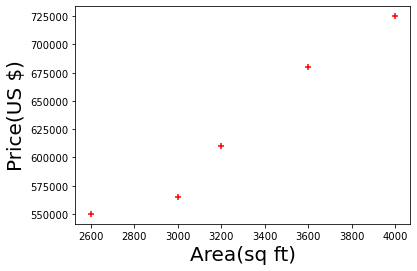

In [5]:
plt.scatter(df['area'], df['price'], color = 'red', marker = '+')
plt.xlabel('Area(sq ft)', fontsize = 20)
plt.ylabel('Price(US $)', fontsize = 20);

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(df[['area']],df.price)

LinearRegression()

In [8]:
lr.predict([[3300]])

array([628715.75342466])

In [9]:
lr.predict([[5000]])

array([859554.79452055])

In [10]:
lr.intercept_

180616.43835616432

In [11]:
lr.coef_

array([135.78767123])

In [12]:
# y = m*x + c
135.78767123*5000+180616.43835616432

859554.7945061643

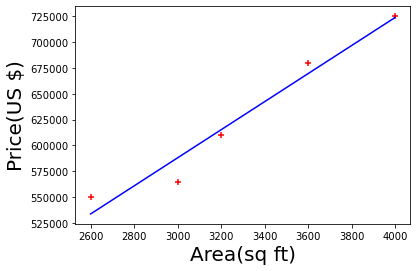

In [13]:
plt.scatter(df['area'], df['price'], color = 'red', marker = '+')
plt.xlabel('Area(sq ft)', fontsize = 20)
plt.ylabel('Price(US $)', fontsize = 20)
plt.plot(df['area'],lr.predict(df[['area']]), color = 'blue');

### Exercise - Linear Regression(Single Variable)

In [14]:
canada = pd.read_csv('canada_per_capita_income.csv')

In [15]:
canada.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [16]:
canada.shape

(47, 2)

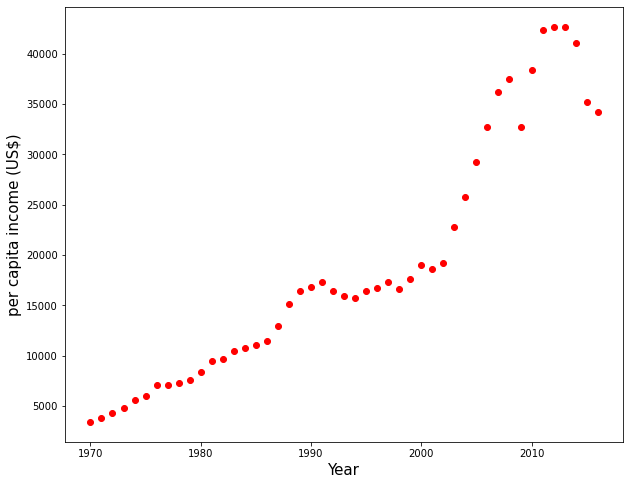

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(canada['year'], canada['per capita income (US$)'], color = 'red' )
plt.xlabel('Year', fontsize =15)
plt.ylabel('per capita income (US$)', fontsize = 15);

In [18]:
lr.fit(canada[['year']], canada['per capita income (US$)'])

LinearRegression()

In [19]:
lr.predict([[2020]])

array([41288.69409442])

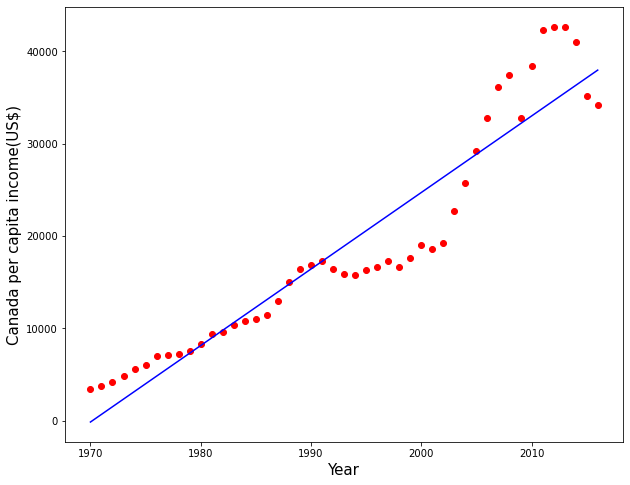

In [20]:
plt.figure(figsize = (10,8))
plt.scatter(canada['year'], canada['per capita income (US$)'],color = 'red')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Canada per capita income(US$)', fontsize = 15 )
plt.plot(canada['year'],lr.predict(canada[['year']]),color = 'blue')

### The predicted Canada's per capita income for year 2020 will be 41288.69409442 US($)

## Linear Regression Multiple Variables

In [21]:
hpm =pd.read_csv('homepricesmulti.csv')

In [22]:
hpm.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [23]:
hpm.shape

(6, 4)

In [24]:
bedrooms_median = hpm.bedrooms.median()
bedrooms_median

4.0

In [25]:
 hpm['bedrooms'].fillna(bedrooms_median, inplace = True)

In [26]:
hpm.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [27]:
X = hpm.drop('price', axis = 1)
y = hpm['price']

In [28]:
lr.fit(X,y)

LinearRegression()

In [29]:
lr.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [30]:
lr.intercept_

221323.00186540425

In [31]:
lr.predict([[3000,3,40]])

array([498408.25158031])

In [32]:
112.06244194*3000+23388.88007794*3+-3231.71790863*40+221323.00186540425


498408.25157402427

In [33]:
lr.predict([[2500,4,5]])

array([578876.03748933])

## Linear Regression Multiple Variables---Exercise

In [34]:
hiring = pd.read_csv('hiring.csv')

In [35]:
hiring.head(10)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [36]:
hiring.shape

(8, 4)

In [37]:
hiring['experience'].fillna('zero',inplace = True)

In [38]:
hiring.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


## Using Dummy Variable method 

In [39]:
hpd = pd.read_csv('homepricesdummy.csv')

In [40]:
hpd.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [41]:
hpd.shape

(13, 3)

In [42]:
hpd['town'].value_counts()

monroe township    5
robinsville        4
west windsor       4
Name: town, dtype: int64

In [43]:
dummies = pd.get_dummies(hpd['town'])
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [44]:
merged = pd.concat([hpd, dummies], axis = 1)

In [45]:
merged.head(20)

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [46]:
merged.drop(['town','west windsor'], axis = 1, inplace = True)
merged.head(15)

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [47]:
X = merged.drop('price', axis =1)
y = merged['price']

In [48]:
lr.fit(X,y)

LinearRegression()

In [49]:
lr.predict([[2800,0,1]])

array([590775.63964739])

In [50]:
lr.predict([[3400,0,0]])

array([681241.66845839])

In [51]:
lr.score(X,y)

0.9573929037221873

# Using Label Encoder

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
hpdle = hpd

In [54]:
hpdle.head(15)

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [55]:
hpdle['town'] = le.fit_transform(hpdle['town'])

In [56]:
hpdle.head(15)

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [57]:
X = hpdle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [58]:
y = hpdle['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

### Using OneHot Encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [60]:
X = ohe.fit_transform(X[['town']]).toarray()
X

<ipython-input-60-8533bf1d4670>:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  X = ohe.fit_transform(X[['town']]).toarray()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [61]:
car= pd.read_csv('carprices.csv')

In [63]:
car.head(25)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [68]:
car['Car Model'] = le.fit_transform(car['Car Model'])

In [70]:
car.head(25)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [71]:
X = car.drop('Sell Price($)', axis = 1)
y = car['Sell Price($)']

In [76]:
X

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [72]:
lr.fit(X,y)

LinearRegression()

In [78]:
lr.predict([[2,45000,4]])

array([33336.7721827])

In [81]:
lr.predict([[1,86000,7]])

array([16106.74127344])

In [80]:
lr.score(X,y)

0.8719970367825952

## Using get dummies

In [85]:
cargd= pd.read_csv('carprices.csv')

In [86]:
cargd.head(15)

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [87]:
dummies=pd.get_dummies(cargd['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [89]:
car_merged = pd.concat([cargd, dummies], axis=1)
car_merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [90]:
car_merged.drop(['Car Model', 'Mercedez Benz C class'], axis = 1, inplace = True)

In [92]:
car_merged.head(20)

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [93]:
X = car_merged.drop('Sell Price($)', axis = 1)
y = car_merged['Sell Price($)']

In [94]:
lr.fit(X,y)

LinearRegression()

In [95]:
lr.score(X,y)

0.9417050937281082

# Logistic Regression

In [96]:
hr = pd.read_csv('HR_comma_sep.csv')

In [97]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [98]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
